# Arrestos en ciudades de USA 

(*An Introduction to Statistical Learning - with Applications in R* de Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani.)

El dataset contiene el número de arrestos cada 100.000 residentes para cada uno de los tres crimenes: ataque, asesinato, violación. UrbanPop es el porcentaje de la población en cada estado que vive en areas urbanas.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creamos un DataFrame de Pandas importando el archivo csv USArrests.csv

df = pd.read_csv('../Data/USArrests.csv', index_col=0)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Necesitamos variables con media 0 y varianza 1:

In [3]:
# Observamos la media de las variables
print("Media de las variables: ")
print(df.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df.var(axis=0))

Media de las variables: 
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64


Varianza de las variables: 
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [6]:
# Normalizamos los datos utilizando el objeto StdSclr:

from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()

df_std = pd.DataFrame(StdSclr.fit_transform(df), index=df.index, columns=df.columns)
df_std.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [7]:
# Observamos nuevamente la media de las variables:
print("Media de las variables: ")
print(df_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(df_std.var(axis=0))

Media de las variables: 
Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64


Varianza de las variables: 
Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64


In [8]:
from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Instanciamos la clase PCA:
pca_arrests = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_arrests.fit(df_std)
pca_arrests

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Imprimo los componentes principales

In [9]:
print(pca_arrests.components_)
# cada registro de df_std puede escribirse en el subespacio de las componentes prinicpales como (coord1, coord2, coord3, coord4):
# coord 1 = 0.53589947 * Murder + 0.58318363 * Assault + 0.27819087 * UrbanPop + 0.54343209 * Rape
# coord 2 =  0.41818087 * Murder +   0.1879856 * Assault + (-0.87280619) * UrbanPop + (-0.16731864) * Rape
# coord 3 = -0.34123273 * Murder +  (-0.26814843) * Assault +  (-0.37801579) * UrbanPop + 0.81777791 * Rape
# coord 4 = 0.6492278 * Murder + (-0.74340748) * Assault +   0.13387773 * UrbanPop + 0.08902432 * Rape

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


In [15]:
# si quisiera quedarme sólo con las primeras dos componenetes principales:
pca_arrests_2 = PCA(n_components= 2)

# Calculamos los componentes principales con el método fit()
pca_arrests_2.fit(df_std)

print(pca_arrests_2.components_)

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]]


Veo que las componenetes principales son ortogonales, es decir que el producto interno de la matriz por la transpuesta da 1 en la diagonal y 0 todo el resto

In [23]:
print(pca_arrests.components_)
print(' ')
print(pca_arrests.components_.T)
print(' ')
print(pca_arrests.components_.T.dot(pca_arrests.components_))

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]
 
[[ 0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [ 0.58318363  0.1879856  -0.26814843 -0.74340748]
 [ 0.27819087 -0.87280619 -0.37801579  0.13387773]
 [ 0.54343209 -0.16731864  0.81777791  0.08902432]]
 
[[ 1.00000000e+00  1.11022302e-16  5.55111512e-17  2.39391840e-16]
 [ 1.11022302e-16  1.00000000e+00  1.66533454e-16 -2.49800181e-16]
 [ 5.55111512e-17  1.66533454e-16  1.00000000e+00 -1.11022302e-16]
 [ 2.39391840e-16 -2.49800181e-16 -1.11022302e-16  1.00000000e+00]]


Al observar los loadings, vemos que el PC1 está más relacionado con las variables 'Murder', 'Assault' y 'Rape', lo que podría representar el grado de criminalidad de cada Estado. 

Por otro lado, el peso de 'UrbanPop' es muy fuerte en el PC2, mientras que el peso de las demás variables es menor.

(El orden de las variables es Murder, Assault, UrbanPop, Rape)

La primera componenete es de tamaño (todos tienen el mismo signo).

La segunda componente es de forma (hay algunos positivos y otros negativos).

In [10]:
# Generamos un DataFrame expresando en términos de nuestros componentes principales:

df_pca = pd.DataFrame(pca_arrests.fit_transform(df_std), columns=['PC1', 'PC2', 'PC3', 'PC4'],\
                      index=df_std.index)
df_pca.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [11]:
# Observamos la media de las variables:
print("Media de los CP: ")
print(df_pca.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de los CPs: ")
print(df_pca.var(axis=0))

Media de los CP: 
PC1    2.664535e-17
PC2   -4.218847e-17
PC3    1.665335e-17
PC4    3.330669e-18
dtype: float64


Varianza de los CPs: 
PC1    2.530859
PC2    1.009964
PC3    0.363840
PC4    0.176969
dtype: float64


In [12]:
# Creamos un DataFRame con los loadings que vamos a usar para graficar

pca_loadings = pd.DataFrame(pca_arrests.components_.T, index=df.columns,\
                            columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_arrests.components_)
display(pca_loadings)

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


# Biplot

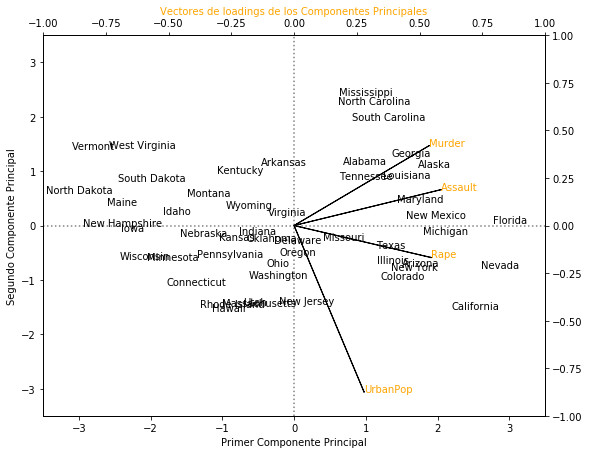

In [17]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_pca.index:
    ax1.annotate(i, (df_pca.PC1.loc[i], df_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], pca_loadings.PC2[3]);

Las variables relacionadas con los crimenes están ubicadas cerca una de otra. Esto indica que las variables relacionadas con crimenes están correlacionadas (estados con tasas de asesinato altas tienden a tener tasas de ataque y violación altas) y que la variable UrbanPop está menos correlacionada con las otras tres.

In [29]:
# Vemos la varianza explicada de cada componente principal como atributo del modelo.

pca_arrests.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [30]:
# Vemos el ratio la varianza explicada de cada componente principal como atributo del modelo.

pca_arrests.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

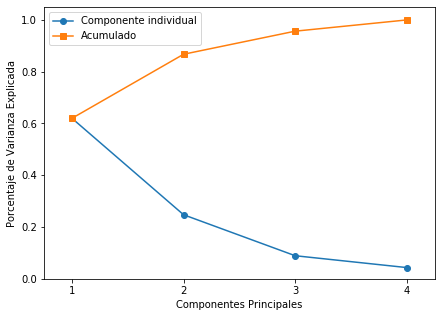

In [31]:
# Ploteamos como incrementa el % de varianza explicada a medida que agregamos componentes:

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca_arrests.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4], np.cumsum(pca_arrests.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);